# Nepali Sentiment Analysis Dataset Cleaning

- Link to [dataset](https://www.kaggle.com/datasets/sibindratimalsina/sentiment-analysis)

- Data loading
- Basic exploration
- Cleaning and preprocessing
- Saving the cleaned dataset

### Goal

Clean the dataset to retain only relevant, structured, and noise-free information for sentiment analysis.


In [1]:
import re
import os
import sys
import pandas as pd

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from deep_translator import GoogleTranslator

## Define File Paths

Set up paths for the dataset location and project structure.

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '../../../'))
sys.path.append(project_root)

In [3]:
from utils.preprocess import remove_html_tags, remove_extra_whitespace

In [4]:
DATASET_PATH = os.path.join(
    project_root,
    'nepali_sentiment_analysis',
    'dataset',
    'raw'
)
print("Available files in dataset directory:", os.listdir(DATASET_PATH))

Available files in dataset directory: ['sentiment_analysis_nepali_final.csv', 'test.csv', 'train.csv', 'unique_tweets']


## Load Dataset

Load the training and testing datasets for inspection.

In [5]:
train_df = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))

### Inspect Train Df

In [6]:
print("Train df Overview:")
train_df.head()

Train df Overview:


,Sentences,Sentiment
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1


In [7]:
print("Train df Info:")
print(train_df.info())

Train df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  5999 non-null   object
 1   Sentiment  6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB
None


In [8]:
print("Train df Description:")
train_df.describe()

Train df Description:


,Sentences,Sentiment
count,5999,6000
unique,4040,8
top,दलाल भगाउ देश बचाउ,1
freq,11,2378


### Inspect Test df

In [9]:
print("Test df Overview:")
test_df.head()

Test df Overview:


,Sentences,Sentiment
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1


In [10]:
print("Test df Info:")
print(test_df.info())

Test df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  1995 non-null   object
 1   Sentiment  1996 non-null   object
dtypes: object(2)
memory usage: 31.3+ KB
None


In [11]:
print("Test df Description:")
test_df.describe()

Test df Description:


,Sentences,Sentiment
count,1995,1996
unique,1857,5
top,धेरै राम्रो कार्यक्रम ल्याउनु भकोमा महानायक रा...,1
freq,3,888


## Handle Missing Values

Drop rows with missing values in both training and testing datasets.

In [12]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

## Merge Datasets

Combine datasets for consistent preprocessing.

In [13]:
train_test_df = pd.concat([train_df, test_df])
train_test_df.reset_index(drop=True, inplace=True)

print("Merged DataFrame Info:")
print(train_test_df.info())

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  7994 non-null   object
 1   Sentiment  7994 non-null   object
dtypes: object(2)
memory usage: 125.0+ KB
None


In [14]:
train_test_df.head()

,Sentences,Sentiment
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1


### Explore Sentiment Distribution

Visualize the distribution of sentiment values.

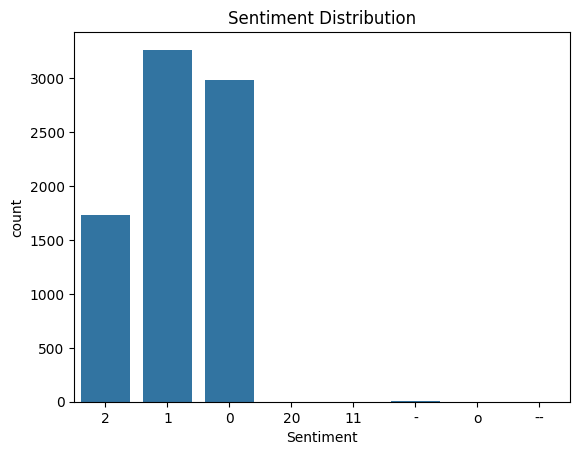

In [15]:
sns.countplot(data=train_test_df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

## Filter Neutral Sentiment

Keep only rows where the sentiment is neutral (`Sentiment == 2`)

In [16]:
train_test_df['Sentiment'] = pd.to_numeric(
    train_test_df['Sentiment'],
    errors='coerce'
)

df_filtered = train_test_df[train_test_df['Sentiment'] == 2].copy()

df_filtered['Sentiment'] = df_filtered['Sentiment'].astype('int64')

In [17]:
print("Filtered DataFrame Info:")
print(df_filtered.info())

Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 0 to 7988
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  1732 non-null   object
 1   Sentiment  1732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 40.6+ KB
None


In [18]:
df_filtered[df_filtered.duplicated(subset=['Sentences'], keep=False)].head()

,Sentences,Sentiment
17,७० करोड घुस प्रकरणमा यसरी रिसाए गोकुल बाँस्कोट...,2
19,भीम रावलको खुलासा : एमाले छोडेर नयाँ दल खोल्ने...,2
21,"प्रचण्डले खुमलटार छोड्दैः पैदल हिँड्ने, झुपडीम...",2
26,"MCC BAHAS | एमसिसी: सन्देह, संवाद र समाधान | A...",2
29,अर्थमन्त्री शर्माको खुलासा:एमसीसी सहमतिमा पारि...,2


In [19]:
df_filtered.loc[df_filtered['Sentiment'] == 2, 'Sentiment'] = 0

### Check for Duplicates and Null Values

Verify data quality in the filtered dataset.

In [20]:
df_filtered.shape

(1732, 2)

In [21]:
print("Duplicates: ", df_filtered.duplicated().sum())
print("Null: ", df_filtered.isnull().sum())

Duplicates:  230
Null:  Sentences    0
Sentiment    0
dtype: int64


In [22]:
# Drop the duplicates, putting only the first occurrence
df_filtered.drop_duplicates(subset=['Sentences'], inplace=True)

In [23]:
df_filtered.shape

(1502, 2)

In [24]:
print("Duplicates: ", df_filtered.duplicated().sum())
print("Null: ", df_filtered.isnull().sum())

Duplicates:  0
Null:  Sentences    0
Sentiment    0
dtype: int64


## Split Sentences

Split text into individual sentences, split by punctuation marks.

In [25]:
# Step 1: Split the sentences into separate rows based on '।' or '?'
df_split = df_filtered['Sentences'].str.split(r'[।?]').explode().str.strip().reset_index(drop=True)

# Step 2: Repeat the Sentiment for each sentence
df_final = df_filtered.loc[df_filtered.index.repeat(df_filtered['Sentences'].str.split(r'[।?]').apply(len))].reset_index(drop=True)

# Step 3: Align the sentiment column with the newly split sentences
df_final['Sentences'] = df_split

# Reset the index for the final DataFrame
df_final = df_final.reset_index(drop=True)

In [26]:
df_final.shape

(2444, 2)

In [27]:
print("Duplicates: ", df_final.duplicated().sum())
print("Null: ", df_final.isnull().sum())

Duplicates:  577
Null:  Sentences    0
Sentiment    0
dtype: int64


In [28]:
df_final.drop_duplicates(subset=['Sentences'], inplace=True)

In [29]:
df_final[df_final.duplicated(subset=['Sentences'], keep=False)].head()

,Sentences,Sentiment


In [30]:
print("Duplicates: ", df_final.duplicated().sum())
print("Null: ", df_final.isnull().sum())

Duplicates:  0
Null:  Sentences    0
Sentiment    0
dtype: int64


In [31]:
df_final.shape

(1867, 2)

## Translate English to Nepali

Translate remaining English words into Nepali using `deep_translator`.


In [32]:
def translate_english_to_nepali_deep_translator(text):
    translator = GoogleTranslator(source='en', target='ne')
    english_phrases = re.findall(r'[a-zA-Z0-9 ()]+', text)
    for phrase in english_phrases:
        if len(phrase.strip()) > 1:
            translated = translator.translate(phrase.strip())
            text = text.replace(phrase, f" {translated} ")
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [33]:
# Test the translator
original_text = df_final.iloc[1]['Sentences']
print(f"Original: {original_text}")
print(f"Translated: {translate_english_to_nepali_deep_translator(original_text)}")

Original: होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महिना भयो (book close ) अहिले सम्म खातामा आउदैन त , ब्याज संग दिने योजना रहेछ कि क्या हो
Translated: होइन यो सानिमा बैंक ले बोनस घोसणा गरेको २ महिना भयो (पुस्तक बन्द) अहिले सम्म खातामा आउदैन त , ब्याज संग दिने योजना रहेछ कि क्या हो


## Remove Stopwords

Remove irrelevant words (stopwords) that don't contribute to sentiment analysis.

In [34]:
def remove_stopwords(text):
    with open(os.path.join(project_root, 'nepali_sentiment_analysis', 'dataset', 'nepali_stopwords.txt'), 'r', encoding='utf-8') as file:
        stopwords = file.read().split('\n')
    return ' '.join([word for word in text.split() if word not in stopwords])

## Preprocess Text

Perform additional preprocessing like HTML tag removal, special character removal, and stopword removal.

In [35]:
def preprocess(text):
    """
    Preprocesses a text string to retain only Nepali characters, numbers, and specific punctuation.
    Removes HTML tags, mentions, URLs, and extra whitespaces.
    
    Args:
        text (str): The input text to preprocess.
    
    Returns:
        str: The preprocessed text.
    """
    # Remove HTML tags
    text = remove_html_tags(text)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)

    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Retain English characters, Nepali characters, nepali numbers, english numbers, and specific punctuation
    text = re.sub(r'[^\u0900-\u097Fa-zA-Z0-9०-९।?]', ' ', text)

    # Translate English characters to Nepali characters
    text = translate_english_to_nepali_deep_translator(text)

    # Finally, retain only the Nepali characters, numbers, and specific punctuation
    text = re.sub(r'[^\u0900-\u097F०-९।?]', ' ', text)

    # remove stopwords
    text = remove_stopwords(text)

    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = remove_extra_whitespace(text)

    return text

In [36]:
# Test the preprocessing function
test_sentence = df_final.iloc[1]['Sentences']
print(f"Original: {test_sentence}")
print(f"Preprocessed: {preprocess(test_sentence)}")

Original: होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महिना भयो (book close ) अहिले सम्म खातामा आउदैन त , ब्याज संग दिने योजना रहेछ कि क्या हो
Preprocessed: होइन सानिमा बैंक बोनस घोसणा गरेको २ महिना भयो किताब बन्द अहिले सम्म खातामा आउदैन त ब्याज संग दिने योजना रहेछ क्या हो


## Apply Preprocessing

In [37]:
tqdm.pandas()

df_final['Sentences'] = df_final['Sentences'].progress_apply(preprocess)

100%|██████████| 1867/1867 [03:53<00:00,  8.01it/s]


In [38]:
df_final.duplicated().sum()

25

In [39]:
print("Duplicates: ", df_final.duplicated().sum())
print("Null: ", df_final.isnull().sum())

Duplicates:  25
Null:  Sentences    0
Sentiment    0
dtype: int64


In [40]:
print("Rows with English words:")
print(df_final[df_final['Sentences'].str.contains(r'[a-zA-Z]')])

Rows with English words:
Empty DataFrame
Columns: [Sentences, Sentiment]
Index: []


In [41]:
df_final.drop_duplicates(subset=['Sentences'], inplace=True)

In [42]:
df_final[df_final.duplicated(subset=['Sentences'], keep=False)].head()

,Sentences,Sentiment


In [43]:
print("Duplicates: ", df_final.duplicated().sum())
print("Null: ", df_final.isnull().sum())

Duplicates:  0
Null:  Sentences    0
Sentiment    0
dtype: int64


In [44]:
df_final.duplicated().sum()

0

In [49]:
# check if any sentence is empty or conatins only whitespace or length is less than 2
df_final = df_final[df_final['Sentences'].apply(lambda x: len(x) > 2)]
df_final

,Sentences,Sentiment
0,बजार जसरी ट्रेन्ड चेन्ज गर्यो हेर्दा तत्काल प्...,0
1,होइन सानिमा बैंक बोनस घोसणा गरेको २ महिना भयो ...,0
2,प्रति कित्तामा रू १० बढेर आज रू ११०० भयो १० कि...,0
3,मध्यभोटेकोशिको शेयर कर्मचारी संञ्चयकोष का संञ्...,0
8,प्रष्ट पारिदिनु होला,0
...,...,...
2439,विजय शाही स्मृति राजा,0
2440,कसो हो,0
2441,अबो मिडिया सिदिने भो हहह,0
2442,य उहाँ मेमरी किङ्ग पो हो,0


In [51]:
df_final.Sentiment.value_counts()

Sentiment
0    1838
Name: count, dtype: int64

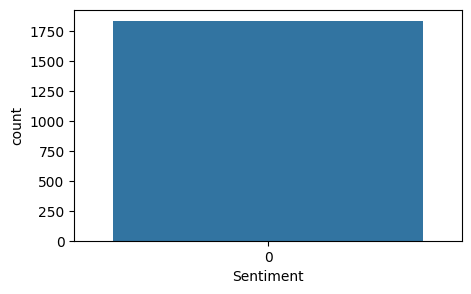

In [52]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df_final, x='Sentiment')
plt.show()

## Save Cleaned Dataset

In [53]:
OUTPUT_DIR = os.path.join(
    project_root,
    'nepali_sentiment_analysis',
    'dataset',
    'cleaned',
)
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

OUTPUT_PATH = os.path.join(OUTPUT_DIR, 'cleaned_train_test_neutral_data.csv')

df_final.to_csv(OUTPUT_PATH, index=False)

if os.path.exists(OUTPUT_PATH):
    print(f"File successfully saved at {OUTPUT_PATH}")
else:
    print("Failed to save the file.")

File successfully saved at c:\Users\Suyash Shrestha\Personal\_Nepali_news_project\Nepali_News_algorithms\news_algorithms\nepali_sentiment_analysis\dataset\cleaned\cleaned_train_test_neutral_data.csv
